In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import category_encoders as ce 

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
data = pd.read_csv('data_cleaned.csv')

In [3]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,7,2015,Jul,27,1,0,1,1,...,C,0,No Deposit,0,0,0,Transient,75.0,0,0
1,Resort Hotel,0,13,2015,Jul,27,1,0,1,1,...,A,0,No Deposit,304,0,0,Transient,75.0,0,0
2,Resort Hotel,0,14,2015,Jul,27,1,0,2,2,...,A,0,No Deposit,240,0,0,Transient,98.0,0,1
3,Resort Hotel,0,14,2015,Jul,27,1,0,2,2,...,A,0,No Deposit,240,0,0,Transient,98.0,0,1
4,Resort Hotel,0,0,2015,Jul,27,1,0,2,2,...,C,0,No Deposit,0,0,0,Transient,107.0,0,0


In [4]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [5]:
data.corr()['is_canceled'].abs().sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.280469
total_of_special_requests         0.227632
required_car_parking_spaces       0.196019
booking_changes                   0.141166
previous_cancellations            0.111502
company                           0.082370
is_repeated_guest                 0.071401
previous_bookings_not_canceled    0.057268
adults                            0.056645
days_in_waiting_list              0.054682
adr                               0.050939
agent                             0.041839
babies                            0.031915
stays_in_week_nights              0.025311
arrival_date_year                 0.014861
children                          0.008185
arrival_date_day_of_month         0.004809
arrival_date_week_number          0.004191
stays_in_weekend_nights           0.003031
Name: is_canceled, dtype: float64

In [6]:
X = data.drop(['is_canceled'], axis=1)
y = data['is_canceled']

In [7]:
numericalFeatures = list(X._get_numeric_data().columns)
categoricalFeatures = list(set(X.columns) - set(numericalFeatures))

for col in categoricalFeatures:
    print(f"{col}({X[col].unique().size}): \n{X[col].unique()}\n") 

customer_type(4): 
['Transient' 'Contract' 'Transient-Party' 'Group']

market_segment(8): 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

arrival_date_month(12): 
['Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec' 'Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun']

assigned_room_type(11): 
['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']

distribution_channel(5): 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type(9): 
['A' 'C' 'D' 'E' 'G' 'F' 'H' 'L' 'B']

country(178): 
['GBR' 'PRT' 'USA' 'ESP' 'IRL' 'FRA' 'UNKNOWN' 'ROU' 'NOR' 'OMN' 'ARG'
 'POL' 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS'
 'EST' 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX'
 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF'
 'AGO' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN'
 'JAM' 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL'
 'GGY' 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(81298, 29)
(34843, 29)
(81298,)
(34843,)


In [9]:
encoder = ce.cat_boost.CatBoostEncoder(cols = categoricalFeatures)
encoder.fit(X_train, y_train)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [10]:
X_train.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0.281572,23,2016,0.334374,6,6,2,1,2,1,...,0.440892,0,0.287074,15,0,0,0.402965,68.75,0,2
1,0.412528,0,2016,0.392257,22,24,0,1,1,0,...,0.440892,0,0.287074,9,0,0,0.402965,135.00,0,0
2,0.281572,0,2015,0.377100,28,8,0,1,1,0,...,0.440892,0,0.287074,146,0,0,0.402965,61.00,0,0
3,0.412528,265,2016,0.375391,42,9,2,3,2,0,...,0.440892,0,0.287074,9,0,0,0.402965,100.30,0,0
4,0.412528,170,2017,0.404925,15,11,0,4,2,2,...,0.243894,0,0.287074,9,0,0,0.402965,193.50,0,2


In [11]:
scaler = StandardScaler().fit(X_train[numericalFeatures],y_train)
X_train[numericalFeatures] = scaler.transform(X_train[numericalFeatures])
X_test[numericalFeatures] = scaler.transform(X_test[numericalFeatures])

In [12]:
X_train.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0.281572,-0.791189,-0.210528,0.334374,-1.556549,-1.114597,1.067048,-0.804164,0.241341,2.225370,...,0.440892,-0.341704,0.287074,-0.558905,-0.199414,-0.142114,0.402965,-0.668400,-0.258489,1.784809
1,0.412528,-1.031201,-0.210528,0.392257,-0.378668,0.940697,-0.945593,-0.804164,-1.471197,-0.265003,...,0.440892,-0.341704,0.287074,-0.614897,-0.199414,-0.142114,0.402965,0.625386,-0.258489,-0.726639
2,0.281572,-1.031201,-1.621184,0.377100,0.063037,-0.886231,-0.945593,-0.804164,-1.471197,-0.265003,...,0.440892,-0.341704,0.287074,0.663604,-0.199414,-0.142114,0.402965,-0.819749,-0.258489,-0.726639
3,0.412528,1.734152,-0.210528,0.375391,1.093683,-0.772048,1.067048,0.249495,0.241341,-0.265003,...,0.440892,-0.341704,0.287074,-0.614897,-0.199414,-0.142114,0.402965,-0.052265,-0.258489,-0.726639
4,0.412528,0.742799,1.200129,0.404925,-0.893991,-0.543682,-0.945593,0.776325,0.241341,4.715744,...,0.243894,-0.341704,0.287074,-0.614897,-0.199414,-0.142114,0.402965,1.767823,-0.258489,1.784809


In [13]:
# fs = SelectKBest(score_func=chi2, k='all')
# fs.fit(X_train, y_train)
# columns = X_train.columns.to_list()
# scores = {columns[i]:fs.scores_[i] for i in range(len(columns))}
# dict(sorted(scores.items(), key=lambda item: item[1], reverse=True))

In [14]:
train = pd.concat([X_train, y_train], axis=1, join='inner')
test = pd.concat([X_test, y_test], axis=1, join='inner')

In [15]:
train.to_csv('train.csv',index=False, header=False)
test.to_csv('test.csv',index=False, header=False)

In [16]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

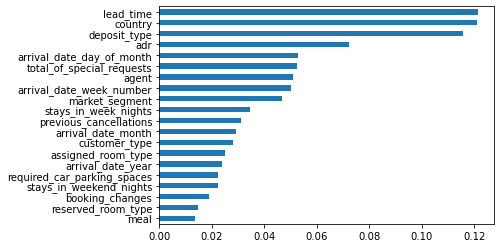

In [17]:
importances = pd.Series(rf.feature_importances_,index=X.columns)
importances = importances.sort_values()
importances[-20:].plot.barh()
plt.show()

In [18]:
y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
conf = confusion_matrix(y_test, y_pred_rf)
clf_report = classification_report(y_test, y_pred_rf)

print(f"Accuracy Score of Random Forest is : {acc_rf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.8936371724593175
Confusion Matrix : 
[[20783  1359]
 [ 2347 10354]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     22142
           1       0.88      0.82      0.85     12701

    accuracy                           0.89     34843
   macro avg       0.89      0.88      0.88     34843
weighted avg       0.89      0.89      0.89     34843



In [19]:
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.8049249490571995
Confusion Matrix : 
[[20300  1842]
 [ 4955  7746]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.92      0.86     22142
           1       0.81      0.61      0.70     12701

    accuracy                           0.80     34843
   macro avg       0.81      0.76      0.78     34843
weighted avg       0.81      0.80      0.80     34843



In [20]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
conf = confusion_matrix(y_test, y_pred_dt)
clf_report = classification_report(y_test, y_pred_dt)

print(f"Accuracy Score of Decision Tree is : {acc_dt}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.848348305255001
Confusion Matrix : 
[[19444  2698]
 [ 2586 10115]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     22142
           1       0.79      0.80      0.79     12701

    accuracy                           0.85     34843
   macro avg       0.84      0.84      0.84     34843
weighted avg       0.85      0.85      0.85     34843



In [21]:
cat = CatBoostClassifier(iterations=100, silent=True)
cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)
print(f'Accuracy: {acc_cat}')
print(f'Classification Report : \n{clf_report}')

Accuracy: 0.8761874695060701
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     22142
           1       0.85      0.81      0.83     12701

    accuracy                           0.88     34843
   macro avg       0.87      0.86      0.87     34843
weighted avg       0.88      0.88      0.88     34843



In [22]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.8087133714088913
Confusion Matrix : 
[[19429  2713]
 [ 3952  8749]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.88      0.85     22142
           1       0.76      0.69      0.72     12701

    accuracy                           0.81     34843
   macro avg       0.80      0.78      0.79     34843
weighted avg       0.81      0.81      0.81     34843

